# Task 3

# **Exploratory Data Analysis - Retail**

**Dataset - SampleSuperstore**



## Importing libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
store_df = pd.read_csv('D:\PYTHON\Data Analyst\py_data_viz\SampleSuperstore.csv')

In [3]:
store_df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [4]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
store_df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
store_df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [7]:
store_df.Country.unique()


array(['United States'], dtype=object)

In [8]:
#since the country column has only one value we will drop the column also we will drop postal code column 
store_df.drop(columns = ['Country','Postal Code'],inplace = True)

In [9]:
#top 10 rows of dataset
store_df.head(10)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,Los Angeles,California,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,Los Angeles,California,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,Los Angeles,California,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,Los Angeles,California,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,Los Angeles,California,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [10]:
#Checking null values
store_df.isnull().sum()

Ship Mode       0
Segment         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [11]:
store_df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [12]:
shipmode_df = store_df.groupby('Ship Mode')[['Sales']].count()
shipmode_df = shipmode_df.sort_values('Sales',ascending=False).reset_index()
shipmode_df.rename(columns={'Ship Mode':'ship_mode'},inplace = True)


In [13]:
shipmode_df

,ship_mode,Sales
0,Standard Class,5968
1,Second Class,1945
2,First Class,1538
3,Same Day,543


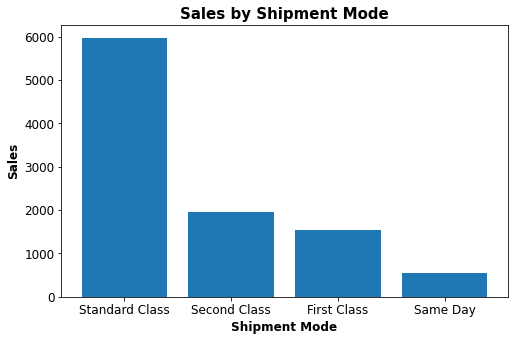

In [14]:
plt.figure(figsize=(8,5))
plt.title('Sales by Shipment Mode',fontsize = 15,fontweight = 'bold')
plt.xlabel('Shipment Mode',fontsize = 12,fontweight = 'bold')
plt.ylabel('Sales',fontsize = 12,fontweight = 'bold')
plt.tick_params(labelsize=12)
plt.bar(shipmode_df.ship_mode,shipmode_df.Sales);

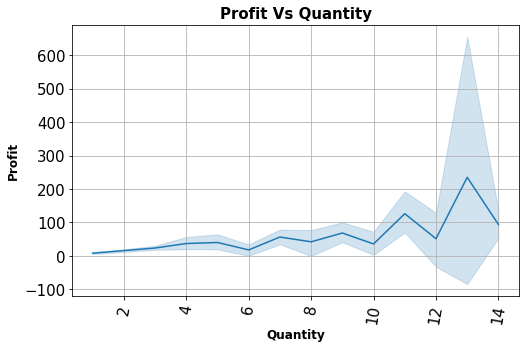

In [15]:
plt.figure(figsize=(8,5))
plt.grid()
a = sns.lineplot(x = store_df.Quantity , y = store_df.Profit);
a.axes.set_title("Profit Vs Quantity",fontsize=15,fontweight='bold')
a.set_xlabel('Quantity',fontsize = 12,fontweight='bold')
a.set_ylabel('Profit',fontsize = 12,fontweight='bold');
plt.xticks(rotation = 80)
plt.tick_params(labelsize=15);


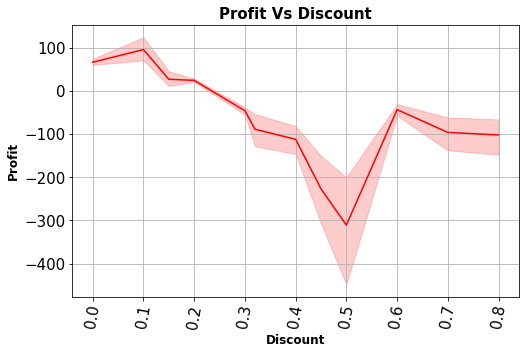

In [16]:
plt.figure(figsize=(8,5))
plt.grid()
b = sns.lineplot(x = 'Discount' , y = 'Profit' , data = store_df , color = 'red');
b.axes.set_title("Profit Vs Discount",fontsize=15,fontweight='bold')
b.set_xlabel('Discount',fontsize = 12,fontweight='bold')
b.set_ylabel('Profit',fontsize = 12,fontweight='bold');
plt.xticks(rotation = 80)
plt.tick_params(labelsize=15);

In [17]:
category_df = store_df.groupby('Category')[['Sales']].count().sort_values('Sales',ascending = True).reset_index()

In [18]:
category_df

,Category,Sales
0,Technology,1847
1,Furniture,2121
2,Office Supplies,6026


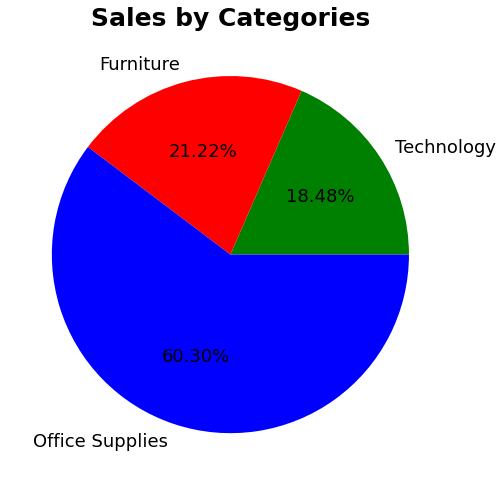

In [19]:
plt.figure(figsize=(8,10))
plt.title('Sales by Categories',fontsize=25,fontweight='bold')
plt.pie(category_df.Sales,labels = category_df.Category , autopct='%1.2f%%',textprops={'fontsize': 18}, colors = {'red','green','blue'});

In [20]:
state_df = store_df.groupby('State')[['Sales']].count().sort_values('Sales' , ascending = False).reset_index()

In [21]:
state_df

,State,Sales
0,California,2001
1,New York,1128
2,Texas,985
3,Pennsylvania,587
4,Washington,506
5,Illinois,492
6,Ohio,469
7,Florida,383
8,Michigan,255
9,North Carolina,249


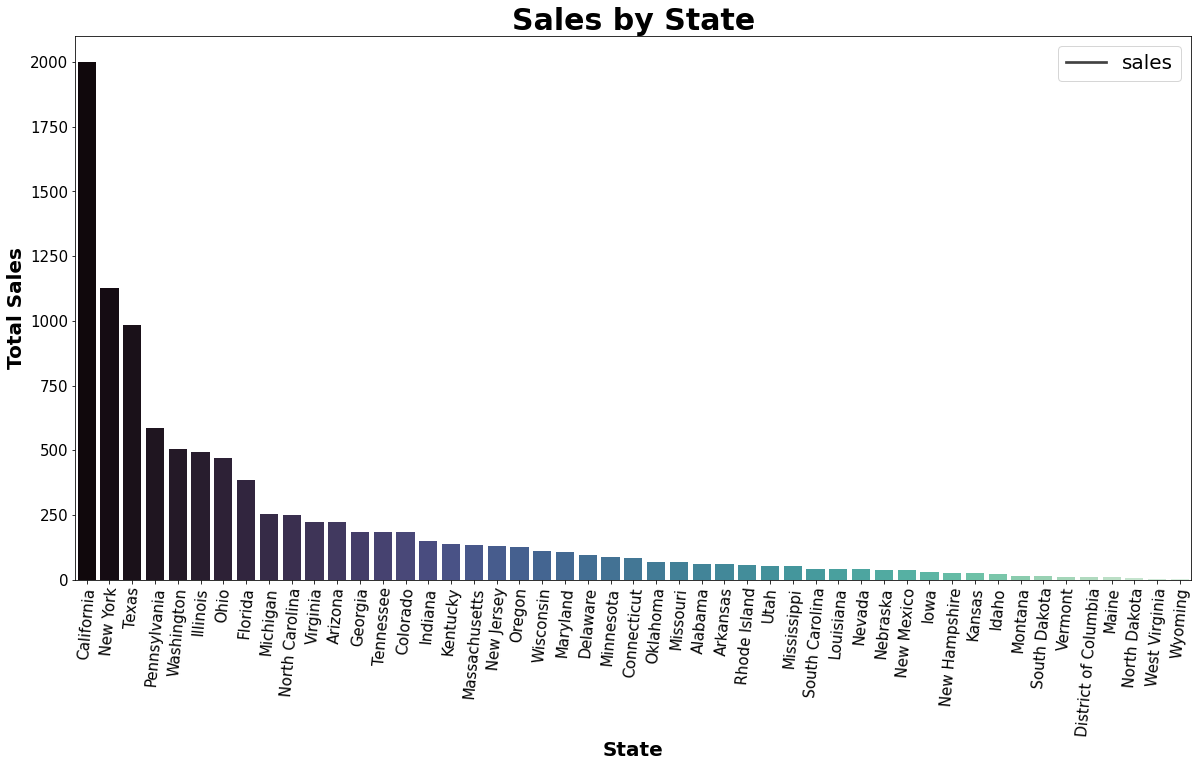

In [22]:
plt.figure(figsize = (20,10))
s = sns.barplot(x = state_df.State , y = state_df.Sales , palette = "mako")
s.axes.set_title("Sales by State",fontsize=30,fontweight='bold')
s.set_xlabel('State',fontsize = 20,fontweight='bold')
s.set_ylabel('Total Sales',fontsize = 20,fontweight='bold')
plt.xticks(rotation = 85)
plt.tick_params(labelsize=15)
plt.legend(['sales'],fontsize=20 );

In [23]:
profit_df = store_df[store_df['Profit']>0]
loss_df = store_df[store_df['Profit']<0]

In [24]:
profit_df

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.960,2,0.0,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.940,3,0.0,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.620,2,0.0,6.8714
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.368,2,0.2,2.5164
5,Standard Class,Consumer,Los Angeles,California,West,Furniture,Furnishings,48.860,7,0.0,14.1694
...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.600,4,0.0,13.3200


In [25]:
segment_df = store_df.groupby('Segment')[['Sales']].count().sort_values('Sales' , ascending = True).reset_index()

In [26]:
segment_df

,Segment,Sales
0,Home Office,1783
1,Corporate,3020
2,Consumer,5191


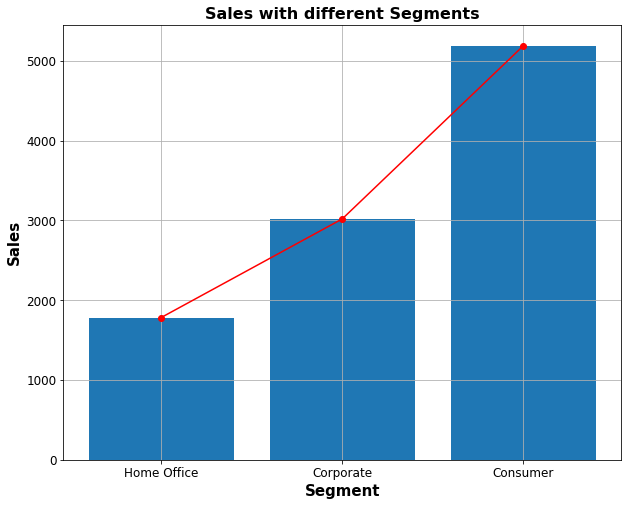

In [27]:
plt.figure(figsize=(10,8))
plt.grid()
plt.title("Sales with different Segments", fontsize=16 , fontweight = 'bold')
plt.xlabel('Segment',fontsize = 15,fontweight = 'bold')
plt.ylabel('Sales',fontsize = 15,fontweight = 'bold')
plt.tick_params(labelsize = 12)
plt.plot(segment_df.Segment , segment_df.Sales , 'o-r')
plt.bar(segment_df.Segment , segment_df.Sales);

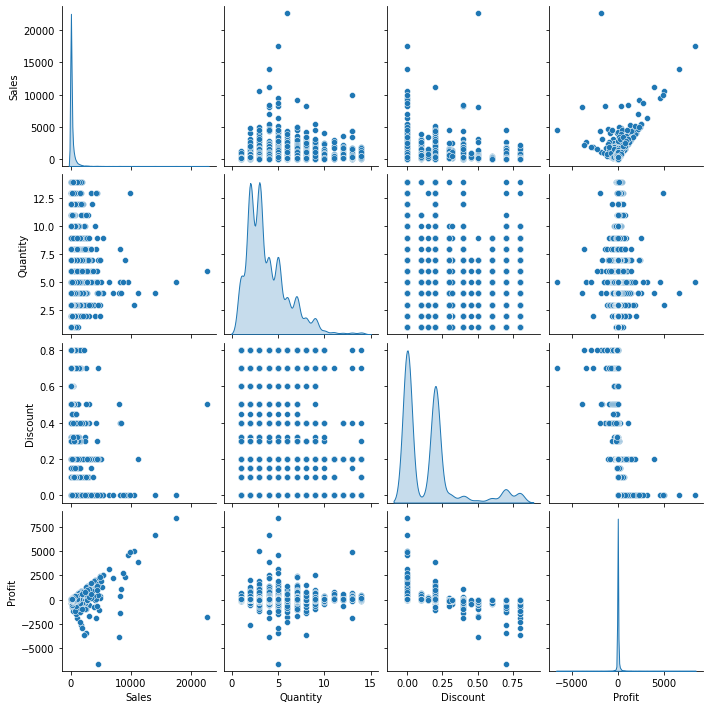

In [28]:
sns.pairplot(store_df,diag_kind = 'kde');

## Comparing Discount and Profit on basis of Sub-Category

In [35]:
sub_df = store_df.groupby('Sub-Category')[['Discount','Profit']].sum().sort_values('Discount',ascending = False).reset_index()

In [36]:
sub_df

,Sub-Category,Discount,Profit
0,Binders,567.00,30221.7633
1,Phones,137.40,44515.7306
2,Furnishings,132.40,13059.1436
3,Chairs,105.00,26590.1663
4,Paper,102.60,34053.5693
5,Tables,83.35,-17725.4811
6,Appliances,77.60,18138.0054
7,Storage,63.20,21278.8264
8,Accessories,60.80,41936.6357
9,Art,59.60,6527.7870


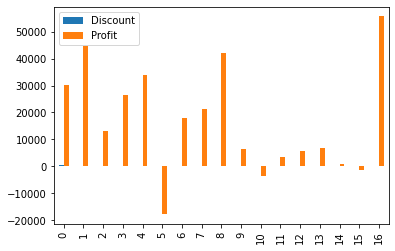

In [45]:
sub_df.plot.bar();

# **Thank You**